## Zomato Restaurants Data Analysis

### PHASE - 1

#### Project context
* The Zomato Restaurants Dataset contains detailed information about restaurants across various cities, including their names, locations, cuisines, average cost for two, ratings, and customer votes. This dataset provides valuable insights into the restaurant industry and customer preferences.

* The objective of this phase Data Understanding & Initial Assessment is to explore the dataset to understand its structure, data types, completeness, and overall quality. By examining missing values, categorical distributions, and numerical summaries, we aim to assess the reliability of the data and identify areas requiring cleaning or preprocessing before analysis and modeling.

### Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('zomato.csv', encoding='latin-1')
df.head() # to get frist five rows only
# observation:  csv file loaded successfully

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape #understanding the shape of the dataset

(51717, 17)

#### Observation
* it showing the rows and columns in dataset as 51717 and 17 with respectly

In [4]:
df['phone'] = df['phone'].astype(str).str.replace('[^0-9]', '', regex=True).apply(lambda x: x[-10:] if len(x) >= 10 else np.nan)

#### Explianation
* Converting all values to text and Removing extra characters like spaces, dashes, and symbols.
* Keeping only the last 10 digits (valid phone number) and Replacing invalid or short numbers with NaN.
* it makes all phone numbers clean, uniform, and valid, which helps in removing duplicates, checking missing data, and using phone numbers correctly in further analysis.

In [5]:
df.dtypes 

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

#### observation:
* .dtypes indivial data type of each column present in zomato dataset

In [6]:
df.isnull().sum() # it show null in column wise

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### observation
* .isnull() will check null values in dataset and .sum() gives the sum of it
* while we use both (like .isnull().sum()) then give total values

#### Data Structure and Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### Observation
* This data set consist of 51717 records and 17 columns
* Most columns are of object type, with votes being the only numerical column.
* Some fields like rate, phone, dish_liked, and approx_cost(for two people) have missing values.
* Columns such as rate and approx_cost(for two people) need cleaning, as they contain non-numeric characters.
* online_order and book_table represent binary categories (Yes/No).

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


#### observation
* The dataset has 51,717 entries for votes.
* The average number of votes per restaurant is 283.7, with a high variation (std ≈ 803.8).
* Median (50%) = 41 votes, meaning most restaurants receive relatively few votes.
* 75% of restaurants have fewer than 198 votes, while a few popular ones reach up to 16,832 votes, indicating strong outliers or highly popular restaurants.

In [9]:
df['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [10]:
df['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [11]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [12]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [13]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

#### observation
* The dataset contains several categorical fields such as online_order, book_table, rest_type, listed_in(type), and listed_in(city).
* Most restaurants accept online orders more and do not offer table booking more.
* The majority belong to the “Casual Dining” and “Quick Bites” categories.
* Restaurants are mainly listed under the “Delivery” type and are concentrated in Bangalore city.

In [14]:
df['rate'].value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [15]:
df['rate'].describe()

count     43942
unique       64
top         NEW
freq       2208
Name: rate, dtype: object

#### Observation
* The rate column represents restaurant ratings given by customers.
* After cleaning the data, most ratings fall between 3.5 and 4.0, with an average rating of around 3.7.
* This shows that the majority of restaurants receive good to very good feedback, while a few have lower or exceptional ratings, indicating moderate variation in quality across restaurants.

In [16]:
df['name'].nunique() #for identifiers

8792

In [17]:
df['votes'].describe() #for scores

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

#### Observation
* The dataset contains key identifier columns such as url, name, and phone, which uniquely represent each restaurant.
* The votes column acts as an important score reflecting customer engagement and popularity.
* Most restaurants have fewer than 200 votes, while a few highly popular ones have received over 10,000 votes, indicating a right-skewed distribution with significant variation in customer attention.

#### 🔹 Numerical columns
* `rate` : Average customer rating (convertible to float)
* `votes` : Number of user votes indicating popularity
* `approx_cost(for two people)`: Approximate cost for two people (convertible to integer)


#### 🔸 Categorical columns
* `url`            : Restaurant’s Zomato webpage link                           
* `address`        : Physical address of the restaurant                         
* `name`           : Name of the restaurant                                     
* `online_order`   : Indicates if online ordering is available (Yes/No)     
* `book_table`     : Indicates if table booking is available (Yes/No)       
* `phone`          : Contact number(s) of the restaurant                        
* `location`       : Area or neighborhood of the restaurant                     
* `rest_type`      : Type of restaurant (e.g., Café, Quick Bites, Casual Dining)
* `dish_liked`     : Dishes liked by customers                                  
* `cuisines`       : Types of cuisines served                                   
* `reviews_list`   : Text of customer reviews                                   
* `menu_item`      : Menu items offered                                         
* `listed_in(type)`: Dining type category (e.g., Delivery, Buffet)              

## PHASE : 2

### Handle Missing Data

In [18]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### observation
* rate → 7,775 missing values: Indicates many restaurants have not received customer ratings yet.
* phone → 1,208 missing values: Some restaurants have not provided contact details.
* location → 21 missing values: A very small number of records lack location information.
* rest_type → 227 missing values: A few entries are missing restaurant type categories.
* dish_liked → 28,078 missing values: This is a major gap, showing that most restaurants do not have customer favorite dishes.
* cuisines → 45 missing values: Minimal missing data

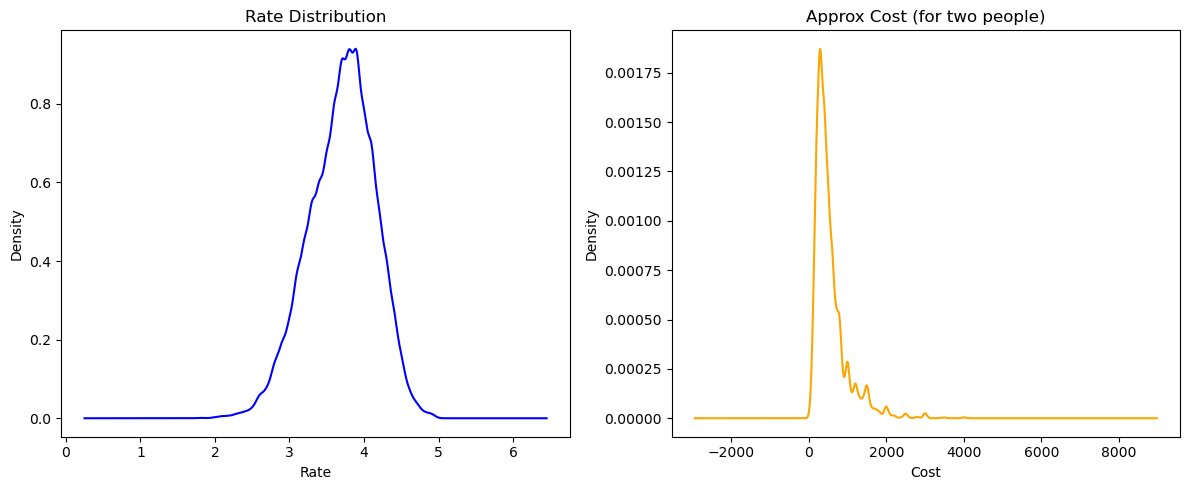

In [23]:
plt.figure(figsize=(12, 5))

# Plot for rate
plt.subplot(1, 2, 1)
df['rate'].plot(kind='kde', color='blue')
plt.title('Rate Distribution')
plt.xlabel('Rate')


# Plot for approx_cost(for two people)
plt.subplot(1, 2, 2)
df['approx_cost(for two people)'].plot(kind='kde', color='orange')
plt.title('Approx Cost (for two people)')
plt.xlabel('Cost')

# Adjust spacing and show plots
plt.tight_layout()
plt.show()

#### Observation:
* Rate: Most restaurants have ratings between 3.0 and 4.5, showing average to good performance.
* Cost: Most places are low-cost, while a few are expensive.
* For 'Rate', we should use the mean for missing values because of its normal distribution. For the remaining tone, we should use the median because of their skewed distribution 

In [24]:
#For 'Rate', we should use the mean for missing values because of its normal distribution. 
#For approx_cost(for two people), we should use the median because of their skewed distribution
df['rate'] = df['rate'].fillna(df['rate'].mean())   # Normally distributed → fill with mean
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())  # Right-skewed so fill with median

In [25]:
df['dish_liked'] = df['dish_liked'].fillna('Not specified') #it is in yes/no so make it as not specified

In [26]:
print(f' Here we go that both location and listed_in(city) is same and it count: {(df['location'] == df['listed_in(city)']).sum()}')

 Here we go that both location and listed_in(city) is same and it count: 16020


In [27]:
df['location'] = df.apply(lambda x: x['listed_in(city)'] if pd.isna(x['location']) else x['location'], axis=1)

# Fill remaining categorical columns with mode
categorical_cols = ['phone', 'rest_type', 'cuisines']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#### Observation
* For 'Rate' and 'approx_cost(for two people)', I filled the missing values with their respective mean and median, and the reason for this choice is mentioned in the code.
* For 'dish_liked', the missing values were filled with 'not specified' because the column is categorical and essentially consists of yes/no responses.
* Next, I checked both the 'location' and 'listed_in(city)' columns. I found that many of the areas were the same, and the number of missing values was low.
* Therefore, I decided to fill the missing 'location' values with the corresponding 'listed_in(city)' values.
* For other categorical columns, I used the mode to fill the missing values(phone, rest_type, cuisines).

### Remove Duplicates

In [28]:
print(f'number of duplicate values in the dataset: {df.duplicated().sum()}')

number of duplicate values in the dataset: 0


#### Observation
* I checked for duplicate values in the Zomato dataset, but there were none.
* If there were duplicate values, the command `df.drop_duplicates(inplace=True)` would be used to drop them.

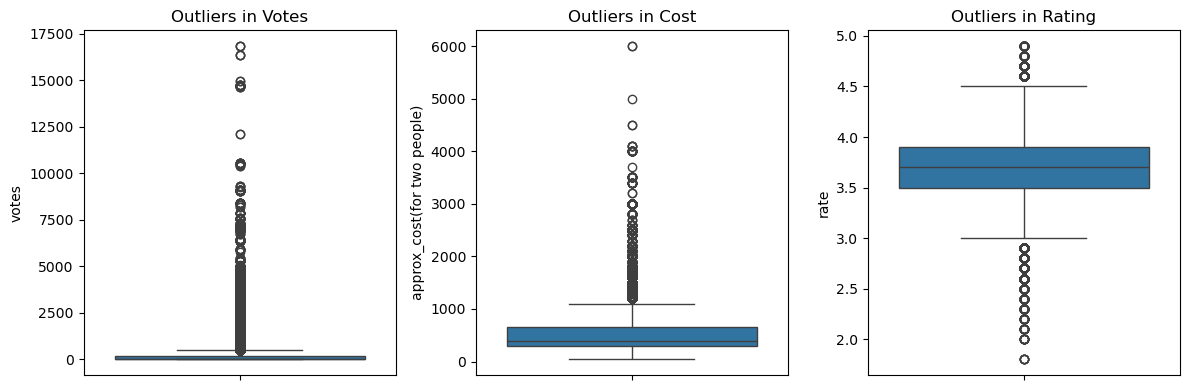

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(df['votes'])
plt.title("Outliers in Votes")

plt.subplot(1,3,2)
sns.boxplot(df['approx_cost(for two people)'])
plt.title("Outliers in Cost")

plt.subplot(1,3,3)
sns.boxplot(df['rate'])
plt.title("Outliers in Rating")

plt.tight_layout()
plt.show()


#### observation:
* Votes: Few restaurants have very high votes, showing they are highly popular.
* Cost: Some restaurants are much more expensive, indicating premium outlets.
* Rating: Ratings are mostly consistent (3.0–4.5) with very few extreme values.

### Fix Inconsistencies in Categorical Data

In [30]:
# here we strandize words into one pattern by using .lower()
columns=['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)', 'listed_in(city)']
for i in columns:
    df[i] = df[i].astype(str).str.strip().str.lower().str.title()

### Convert Data Types

In [20]:
df['rate'] = df['rate'].astype(str).str.replace('/5', '').replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = df['rate'].astype(float)  

#### Observation
* Convert to String: The data is first converted to a string format.
* Replace Elements: This allows for replacing problematic non-numeric elements (like symbols or text).
* Convert to Float: The cleaned string data is then converted to float to correctly handle the decimal values and it is useful for Data Analysis.

In [21]:
df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].astype(str).str.replace(',', '').replace('nan', np.nan))
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'])

#### Explianation:
* Firstly, I converted the 'approx_cost(for two people)' column into a string, then removed and replaced some unnecessary elements.
* Then, it was converted into a numerical form (float) because it consists of decimal values.
* This change was made for further data analysis.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

#### Observation
* after covertion data type and filling missing values

### Visual Analysis
#### Univariate Analysis

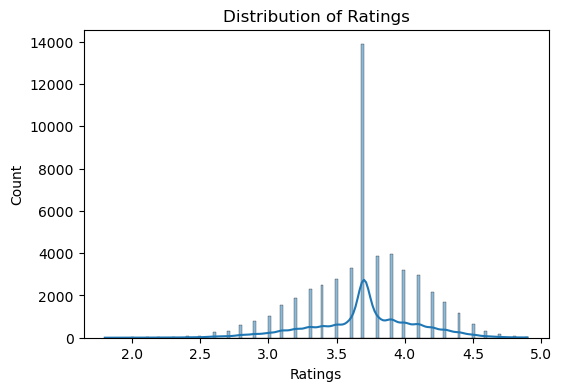

In [31]:
# Rating Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['rate'], kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

#### Observation
* Most restaurant ratings fall between 3.0 and 4.5.
* Very few restaurants have very low or very high ratings.
* The distribution shows that customers usually give moderate to good ratings.
* Overall, the ratings indicate good quality restaurants in the dataset.

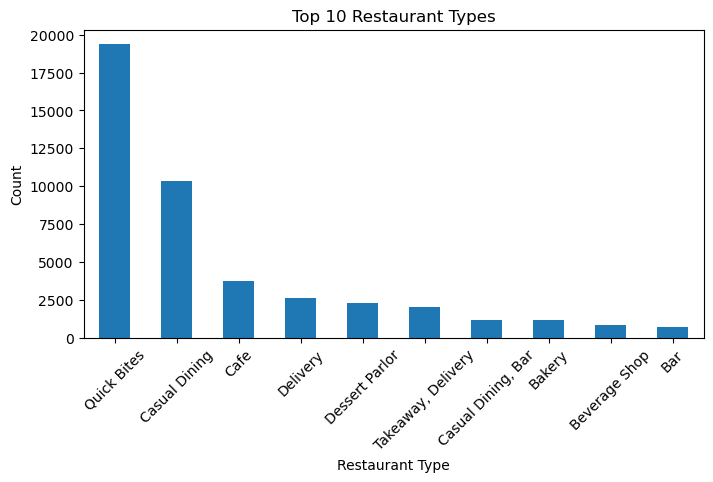

In [32]:
# Restaurant Type Count
plt.figure(figsize=(8,4))
df['rest_type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Restaurant Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### observation
* Casual Dining and Quick Bites are the most common restaurant types.
* Cafe-style and dessert-focused formats also appear frequently.
* Fine-dining and premium restaurant types are less common compared to everyday dining formats.
* This shows that the market largely focuses on affordable, casual, and fast-service restaurants rather than luxury dining.* 

#### Bivariate Analysis

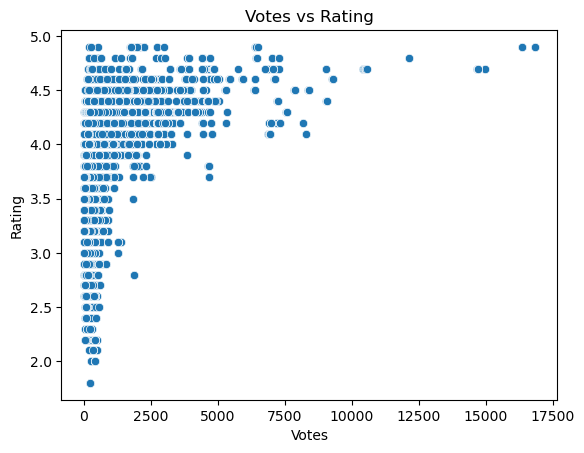

In [33]:
# vote vs Rating(numerical vs numerical)
sns.scatterplot(x=df['votes'], y=df['rate'])
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

#### observation
* Restaurants with higher votes usually have higher ratings.
* Majority of restaurants have low votes and average ratings.
* A few restaurants with very high votes show strong ratings, indicating popularity.
* Overall, there is a positive relationship between votes and rating — more votes often means better customer feedback.

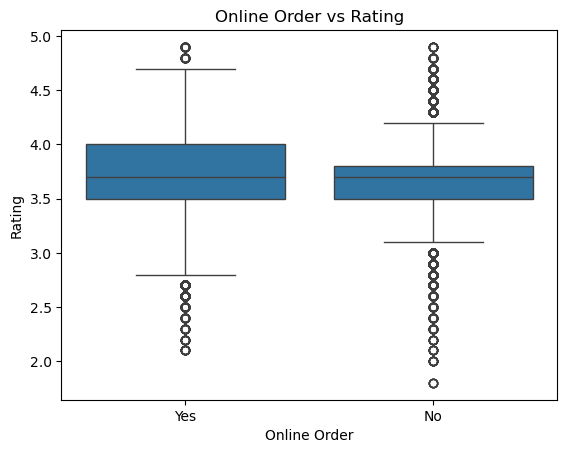

In [34]:
# Online Order vs Rating(categorical vs numerical)
sns.boxplot(x=df['online_order'], y=df['rate'])
plt.title("Online Order vs Rating")
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.show()

#### observation
* Restaurants that offer online ordering generally show slightly higher ratings than those that do not.
* The median rating for online-order restaurants is higher, indicating better customer satisfaction.
* Rating variation is wider for online-order restaurants, meaning they include both average and top-rated places.
* Restaurants without online ordering mostly stay in the average rating range, showing lower customer engagement or popularity.

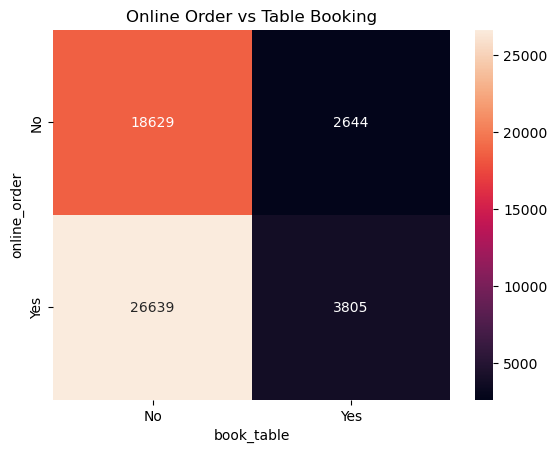

In [35]:
# Online Order vs Table Booking(categorical vs categorical)
a=pd.crosstab(df['online_order'], df['book_table'])
sns.heatmap(a, annot=True, fmt="d")
plt.title("Online Order vs Table Booking")
plt.show()

#### Observation
* Most restaurants offer online ordering but do not provide table booking.
* A smaller number of restaurants offer both online order and table booking options.
* Very few restaurants do not offer online ordering but allow table booking.
* Overall, online ordering is much more common than table reservation in this dataset* 

#### Multivariate Analysis

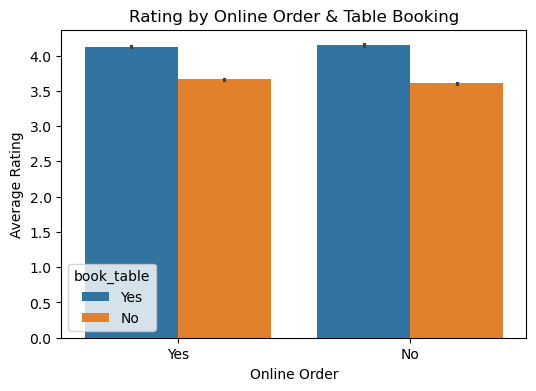

In [36]:
# Online Order + Table Booking vs Rating
plt.figure(figsize=(6,4))
sns.barplot(x='online_order', y='rate', hue='book_table', data=df)
plt.title("Rating by Online Order & Table Booking")
plt.xlabel("Online Order")
plt.ylabel("Average Rating")
plt.show()

#### Observation
* Restaurants that offer both online ordering and table booking have the highest average ratings.
* Restaurants offering online ordering only also show good ratings, better than those without online services.
* Restaurants that do not provide table booking or online ordering tend to have lower average ratings.
* This suggests that providing multiple convenience services (online ordering + table booking) leads to higher customer satisfaction* 

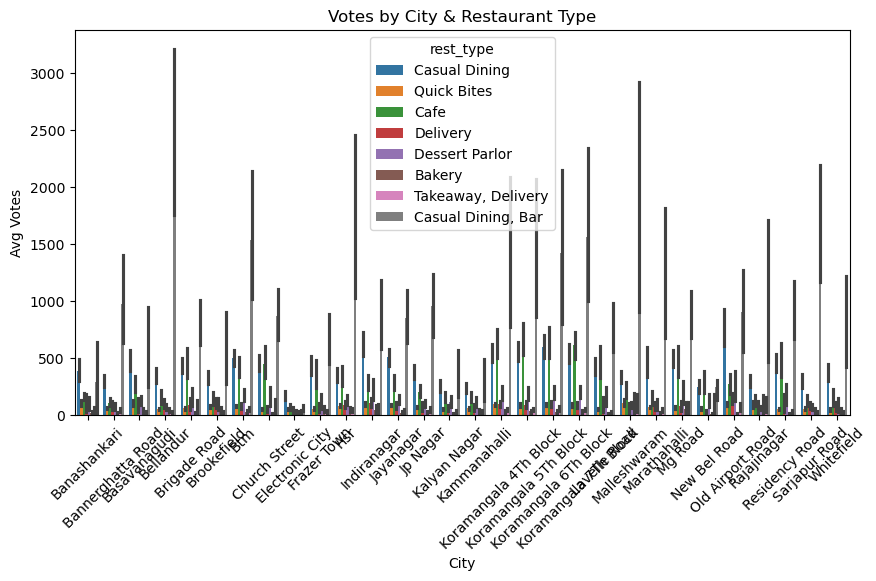

In [37]:
# City + Restaurant Type vs Votes (Top 8 Types)
top_rest_types = df['rest_type'].value_counts().head(8).index
plt.figure(figsize=(10,5))
sns.barplot(x='listed_in(city)', y='votes', hue='rest_type', data=df[df['rest_type'].isin(top_rest_types)])
plt.title("Votes by City & Restaurant Type")
plt.xlabel("City")
plt.ylabel("Avg Votes")
plt.xticks(rotation=45)
plt.show()

#### Observation
* Votes vary across cities, meaning customer engagement differs by location.
* Certain restaurant types (like Casual Dining & Quick Bites) receive higher votes consistently across cities.
* Some cities show higher vote averages, indicating more active customer participation or higher restaurant popularity.
* The combination of city + restaurant type plays an important role in determining restaurant popularity* 